![Project Cover](https://storage.googleapis.com/kaggle-datasets-images/6988295/11193915/3cbfb21249d4e529407b3a55927756b1/dataset-cover.jpg?t=2025-03-28-08-49-13)


### Credit Card Fraud Detection – Project Overview
📌 Introduction

Credit card fraud is a critical issue in financial systems worldwide. The dataset used in this project contains real credit card transactions made by European cardholders in September 2013. It includes 284,807 transactions, of which 492 are frauds (≈ 0.13%).

The dataset is highly imbalanced, which makes it a challenging and realistic case for fraud detection. Most of the features are anonymized using PCA (Principal Component Analysis) due to confidentiality reasons, except for two fields: Time and Amount.

### 🎯 Objectives

The main goals of this project are:

Exploratory Data Analysis (EDA): Understand the distribution of data, class imbalance, and identify patterns.

Preprocessing: Apply scaling, normalization, and resampling techniques to handle imbalanced data.

Model Development: Build and evaluate machine learning models such as Logistic Regression, Decision Trees, Random Forest, and Support Vector Machines.

Performance Evaluation: Use metrics like ROC-AUC, Precision, Recall, and F1-score to assess the effectiveness of fraud detection.

Optimization: Compare traditional Scikit-Learn models with IBM Snap ML, measuring improvements in training time and accuracy.

### 📊 Expected Outcomes

Develop a classification pipeline that efficiently detects fraudulent transactions.

Compare algorithms to highlight trade-offs between accuracy, recall, and training performance.

Provide insights into handling imbalanced datasets in financial applications.

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#ignore warnings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [4]:
#load the dataset
df = pd.read_csv("AIML dataset.csv")

In [5]:
#display the first few rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# retrieve column names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
# Fraud vs. Non-Fraud cases
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
# Checking the distribution of automatically flagged (system-detected) fraud attempts

df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
#check for missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# get the shape of the dataset
df.shape

(6362620, 11)

In [12]:
# Percentage of fraud cases in the dataset
round((df["isFraud"].value_counts()[1]/ df.shape[0]) * 100, 2)

0.13

#### Plotting the distribution of transaction types to understand which categories are most frequent in the dataset

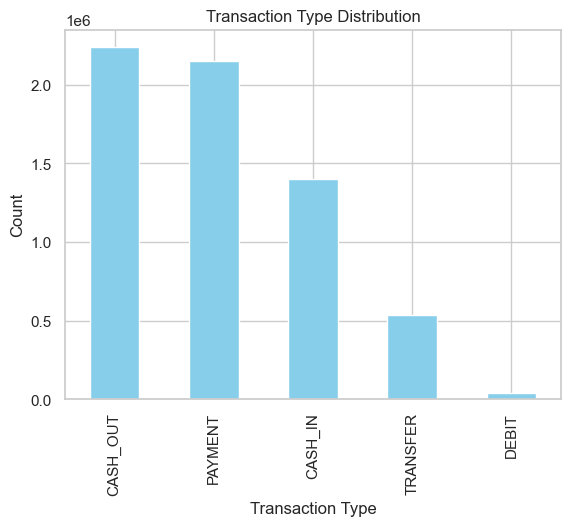

In [13]:
df["type"].value_counts().plot(kind="bar", title="Transaction Type Distribution", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

**Summary of Transaction Type Distribution**

The chart illustrates the distribution of different transaction types in the dataset. The most frequent transactions are CASH_OUT and PAYMENT, each with over 2 million occurrences. These are followed by CASH_IN with around 1.4 million, and TRANSFER with roughly half a million. DEBIT transactions are very rare, appearing only a few times compared to the others.

This distribution highlights that most transactions in the dataset involve cash withdrawals and payments, while debit transactions are almost negligible.

#### Fraud Rate By Transaction plot 

In this step, I calculate and visualize the fraud rate by transaction type. By grouping transactions according to their type and averaging the isFraud column, we can identify which transaction categories (e.g., CASH_OUT, TRANSFER) have the highest proportion of fraudulent activity. This helps us spot the transaction types most vulnerable to fraud.

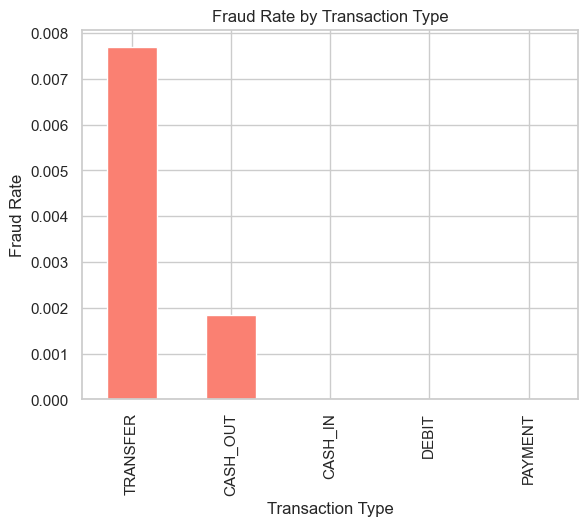

In [14]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Type")
plt.show()


**From the visualization:**

 * Transfer transactions have the highest fraud rate, standing out significantly compared to all other transaction types.

 * Cash-out transactions also show some fraudulent activity, though much lower than transfers.

 * Other transaction types like Cash-in, Debit, and Payment display essentially no fraud cases in this dataset.

**🔎 Key Insight:**

This indicates that fraudsters primarily exploit Transfer and Cash-out operations to move or withdraw illicit funds, which aligns with real-world fraud patterns. Monitoring these transaction types more closely is crucial for fraud detection systems.

In [15]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [16]:
# Statistical summary of the 'amount' column
df["amount"].describe().astype(np.int64)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

#### Log Transformed Transaction amount Distribution 

In this step, we examine the distribution of transaction amounts. Since raw transaction amounts are highly skewed (with a few very large values dominating the scale), we apply a log transformation (log(Amount + 1)). This helps compress extreme values and makes the distribution more interpretable. By plotting a histogram with a density curve, we can better visualize the overall spread and detect patterns or anomalies in transaction amounts.

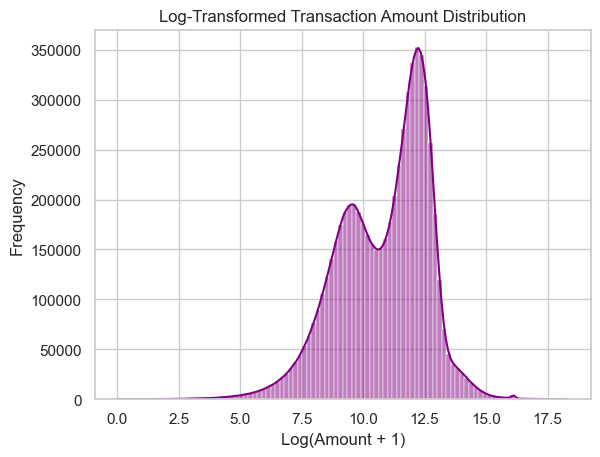

In [18]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="purple")
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()

** Key Observations: **

 * Most transactions cluster between log(Amount + 1) values of 9 and 13, which corresponds to moderate-to-large monetary amounts when converted back to the original scale.

 * The transformation successfully reduces skewness, making the distribution easier to analyze by compressing the effect of extreme outliers.

 * A noticeable peak around log ~12 suggests a common transaction size that dominates the dataset.

 * Smaller peaks around log ~9–10 and >15 indicate secondary transaction groups, possibly reflecting different user behaviors (e.g., regular payments vs. high-value fraud attempts).

#### Boxplot of Transaction Amounts by Fraud Status (Filtered under 50,000)

**Explanation:**

This boxplot compares the distribution of transaction amounts between fraudulent (isFraud = 1) and non-fraudulent (isFraud = 0) transactions, focusing only on transactions under 50,000 to remove extreme outliers.

The goal is to observe whether fraudulent transactions typically occur at higher amounts compared to legitimate ones, or if there is significant overlap.

 * The median line inside each box shows the typical transaction amount for each group.

 * The spread of the box (interquartile range) highlights variability within each category.

 * Whiskers and outliers reveal unusual transactions that deviate from the bulk of the data.

👉 We expect fraudulent transactions to generally have higher median values and wider variability compared to non-fraudulent ones, since fraud is often associated with larger transfers.

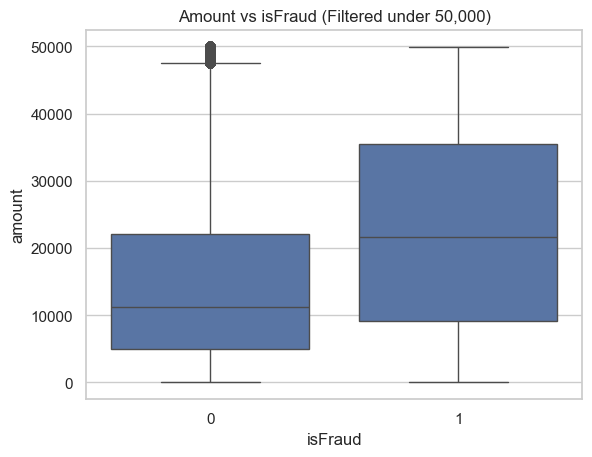

In [17]:
sns.boxplot(data= df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50,000)")
plt.show()

**Explanation:**

This boxplot compares the distribution of transaction amounts between fraudulent (isFraud = 1) and non-fraudulent (isFraud = 0) cases, considering only transactions below 50,000 units. It allows us to examine whether fraudulent transactions tend to involve higher amounts compared to legitimate ones, and to identify differences in variability, median values, and the presence of outliers between the two groups.

#### Created two new columns

In this dataset, the columns oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest represent account balances before and after a transaction — for both the origin (sender) and destination (receiver).

By calculating:

balanceDiffOrig = oldbalanceOrg - newbalanceOrig

balanceDiffDest = newbalanceDest - oldbalanceDest

we can capture the actual change in balances caused by each transaction.

In [18]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [19]:
# Count of negative balance differences for origin accounts
(df["balanceDiffOrig"] < 0).sum()

1399253

In [20]:
# Count of negative balance differences for destination accounts
(df["balanceDiffDest"] < 0).sum()

1238864

In [21]:
# Identifying the top 10 most frequent senders of transactions in the dataset
top_senders = df["nameOrig"].value_counts().head(10)

In [22]:
# print the top senders
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [23]:
# Identifying the top 10 most frequent receivers of transactions in the dataset
top_receivers = df["nameDest"].value_counts().head(10)

In [24]:
# print the top receivers
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [25]:
# Identifying the top 10 users with the highest number of fraudulent transactions
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [26]:
# print the top users involved in fraud
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [28]:
# Filtering transactions to only include 'TRANSFER' and 'CASH_OUT' types
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [29]:
# display the first few rows of the filtered dataframe
fraud_types.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [30]:
# display the counts of each transaction type in the filtered dataframe
fraud_types.value_counts("type")

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

#### Plot Title: Fraud Distribution in Transfer and Cash Out Transactions

This visualization focuses specifically on the transaction types most associated with fraudulent behavior: TRANSFER and CASH_OUT. Using a count plot, we compare the distribution of fraudulent (isFraud = 1) versus non-fraudulent (isFraud = 0) transactions for each of these categories. The goal is to highlight where fraud occurs more frequently and provide a clearer understanding of which transaction types represent the highest fraud risk in the dataset.

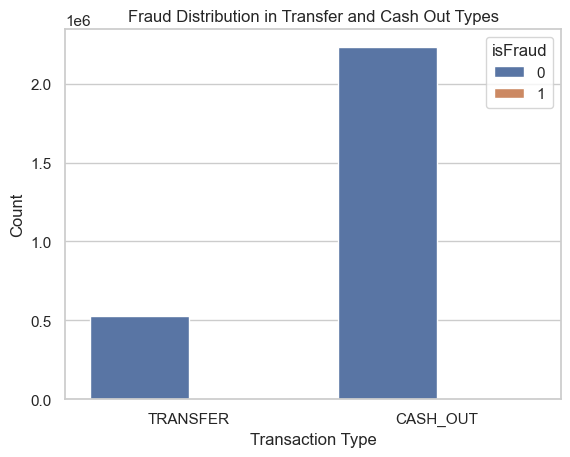

In [31]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

This plot compares the distribution of fraudulent (isFraud = 1) versus non-fraudulent (isFraud = 0) transactions within the two transaction types most commonly associated with fraud: TRANSFER and CASH_OUT.

**From the visualization:**

 * Both transaction types are heavily dominated by non-fraudulent cases (blue bars).

 * Fraudulent transactions (orange bars) are present but extremely rare compared to the overall volume.

 * Despite their rarity, fraud detection models must focus on these categories since fraud cases in TRANSFER and CASH_OUT carry high financial risk.

### Correlation 

To better understand the relationships between transaction features, we compute the correlation matrix for key numerical variables such as transaction amount, sender and receiver balances, and the fraud indicator (isFraud). This analysis helps identify which financial features are most strongly associated with fraudulent behavior and can provide useful insights for feature selection in fraud detection models.

In [32]:
corr = df[[ "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


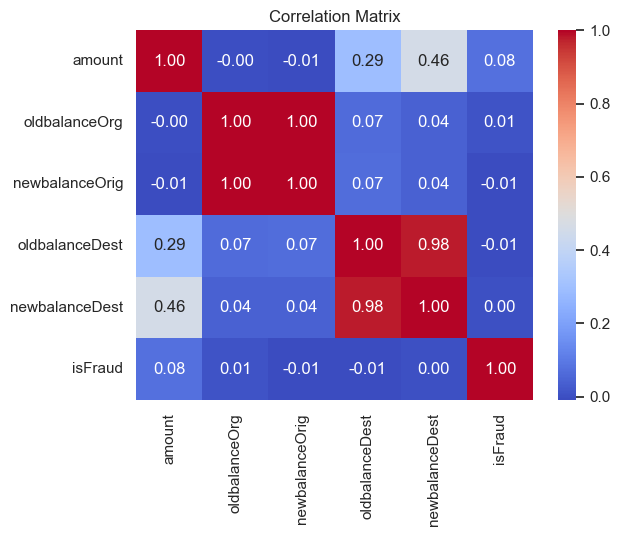

In [34]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The heatmap reveals several important insights about the correlations between transaction variables and fraud:

 * Strong correlations between balances: oldbalanceOrg and newbalanceOrig are perfectly correlated (1.00), as are oldbalanceDest and newbalanceDest (0.98). This suggests these features are highly redundant, likely due to the way balances are recorded after transactions.

 * Moderate correlation with transaction amount: Transaction amount has moderate correlations with destination balances (0.29 with oldbalanceDest and 0.46 with newbalanceDest). This makes sense, since higher transaction amounts directly affect balances.

 * Weak correlation with fraud: The variable isFraud shows only very weak correlation with other numeric features (maximum of 0.08 with transaction amount). This confirms that fraud detection is not linearly explained by single numerical features, highlighting the need for more complex models (e.g., tree-based or ensemble methods) that can capture nonlinear relationships and feature interactions.

#### 📌 Conclusion: 

While the heatmap shows strong internal relationships between balances, fraud (isFraud) is only weakly correlated with individual variables, reinforcing the necessity of advanced modeling techniques rather than relying on simple correlation-based analysis.

Check transactions where the sender had a positive balance before, but their new balance dropped to zero after the operation, specifically focusing on TRANSFER and CASH_OUT types. Such cases may indicate suspicious or fraudulent behavior

In [34]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"])) 
]

In [35]:
# len of the filtered dataframe
len(zero_after_transfer)

1188074

In [36]:
zero_after_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


### Logistic Regression Model Construction

Now that the Exploratory Data Analysis (EDA) has been completed, we will move forward to building a predictive model. The chosen algorithm is Logistic Regression, which is well-suited for binary classification tasks such as fraud detection.

** The main objectives of this phase are:**

 * To train a logistic regression model on the processed dataset.

 * To evaluate the model’s performance using appropriate metrics (e.g. precision, recall, F1-score).

 * To determine how well the model can distinguish between fraudulent and non-fraudulent transactions.

This step marks the transition from understanding the dataset to applying machine learning techniques for fraud detection.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
# Prepare the data for modeling
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud", "step"], axis=1)

In [39]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [40]:
# Define categorical and numerical features
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [41]:
# define target and features
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [42]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [43]:
# apply standard scaling to numerical features and one-hot encoding to categorical features
preprocessor =  ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop= "first"), categorical)
    ],
    remainder = "drop"
)

In [44]:
# create a pipeline that first preprocesses the data then applies logistic regression
model_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [45]:
#train the model
model_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
# make predictions
y_pred = model_pipeline.predict(X_test)

In [47]:
# evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



#### Logistic Regression Model Results – Fraud Detection

The model achieved an overall accuracy of 95%, which might look strong at first glance. However, when we analyze fraud detection specifically:

 * Class 0 (Non-Fraudulent Transactions):

   * Precision and recall are extremely high (near 1.00 and 0.95), meaning the model is excellent at correctly identifying normal transactions.

 * Class 1 (Fraudulent Transactions):

   * Precision is very low (0.02), which indicates that many of the transactions flagged as fraud were actually false positives.

   * Recall is very high (0.94), showing that the model is effective at finding most fraudulent cases, but at the cost of misclassifying many non-fraudulent transactions.

   * The F1-score is only 0.04, highlighting the imbalance in performance for fraud detection.

 * Macro Average:

   * Indicates imbalance between fraud and non-fraud detection, with the fraud class dragging the average down.

 * Weighted Average:

   * Strong values dominated by the majority class (non-fraudulent), masking poor fraud precision.

In [57]:
confusion_matrix(y_test, y_pred)

array([[1804823,  101499],
       [    151,    2313]], dtype=int64)

** Confusion Matrix Results (Logistic Regression Model)**

 * True Negatives (TN = 1,804,823): The model correctly identified the majority of non-fraudulent transactions.

 * False Positives (FP = 101,499): These are legitimate transactions incorrectly flagged as fraud.

 * False Negatives (FN = 151): A small number of fraudulent transactions missed by the model.

 * True Positives (TP = 2,313): Fraudulent transactions correctly detected.

➡️ **Conclusion:**

 The model has very strong performance in detecting fraud (high recall), but at the cost of generating a large number of false positives. This means it is effective for catching fraudulent activity but may inconvenience legitimate customers by flagging too many normal transactions.

In [48]:
model_pipeline.score(X_test, y_test) * 100

94.67462565211606

#### Model Accuracy

The Logistic Regression model achieved an accuracy of ~94.7% on the test set.

⚠️ However, accuracy alone can be misleading in imbalanced datasets such as fraud detection. Since fraudulent transactions make up only a tiny fraction of the data, a model can achieve very high accuracy simply by predicting most cases as “non-fraud.”

### Random Forest Model for Fraud Detection

To complement the Logistic Regression model, we implemented a Random Forest Classifier. Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve predictive accuracy and reduce the risk of overfitting. This approach is especially useful in fraud detection tasks because it can capture complex non-linear relationships and interactions between features.

In this case, the Random Forest was trained with:

 * 200 decision trees (n_estimators=200) for stability and performance.

 * Class weighting set to “balanced” to address the strong class imbalance between fraudulent and non-fraudulent transactions.

* All available CPU cores (n_jobs=-1) to speed up training.

The model was then evaluated on the test set using classification metrics (precision, recall, F1-score), a confusion matrix, and overall accuracy. These outputs allow us to compare performance directly with Logistic Regression and determine whether Random Forest provides better detection of fraud cases while minimizing false positives.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a new pipeline using Random Forest
rf_pipeline = Pipeline([
    ("prep", preprocessor),  # use the same preprocessor already defined
    ("clf", RandomForestClassifier(
        n_estimators=200,       # number of trees in the forest
        max_depth=None,         # unlimited depth (can be tuned)
        class_weight="balanced",# handle class imbalance by adjusting weights
        n_jobs=-1,              # use all available CPU cores
        random_state=42         # reproducibility of results
    ))
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print overall accuracy score
print("Accuracy:", rf_pipeline.score(X_test, y_test) * 100, "%")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.78      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
[[1906256      66]
 [    549    1915]]
Accuracy: 99.96778056838221 %


#### Conclusion: Random Forest vs. Logistic Regression

The Random Forest model significantly outperforms the Logistic Regression approach in detecting fraudulent transactions.

Accuracy improved from ~94.7% (Logistic Regression) to ~99.97% (Random Forest).

For the fraudulent class (1), Random Forest achieved a precision of 0.97 and a recall of 0.78, compared to Logistic Regression’s precision of 0.02 and recall of 0.94.

This means Random Forest not only detects fraud at a high rate but also drastically reduces the number of false positives.

**The confusion matrix reinforces this:** 

 * Logistic Regression misclassified over 100k legitimate transactions as fraud, while Random Forest reduced false positives to just 66 cases.

 * Random Forest also correctly identified 1,915 fraudulent cases, though it missed 549 (a trade-off compared to Logistic Regression, which caught almost all but with massive false positives).

**🔑 Key Insight:** Logistic Regression struggled with the extreme class imbalance, labeling too many legitimate transactions as fraud. Random Forest, on the other hand, provided a balanced trade-off between fraud detection and minimizing false alarms, making it a far superior choice for practical fraud detection.

#### Gradient Boosting and XGBoost Model

Gradient Boosting is an ensemble learning technique that builds models sequentially, with each new model attempting to correct the errors of the previous ones. It combines the predictions of many weak learners (usually decision trees) to create a strong predictive model.

XGBoost (Extreme Gradient Boosting) is a highly optimized implementation of gradient boosting, designed for speed and performance. It introduces regularization techniques, parallelization, and efficient handling of missing data, making it one of the most popular algorithms in machine learning competitions and real-world applications.

**In the context of fraud detection, XGBoost is particularly valuable because:**

 * It can capture complex non-linear relationships in the data.

 * It is highly effective at dealing with imbalanced datasets like fraud detection scenarios.

 * It provides strong predictive power and generalization ability, often outperforming simpler models such as logistic regression.

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a pipeline with the same preprocessor and XGBoost as classifier
xgb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", XGBClassifier(
        n_estimators=300,        # number of boosting rounds
        learning_rate=0.1,       # step size shrinkage
        max_depth=6,             # depth of each tree
        scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # handle imbalance
        subsample=0.8,           # subsample ratio for training instances
        colsample_bytree=0.8,    # subsample ratio for features
        n_jobs=-1,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"    # avoid warning in new versions
    ))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("Accuracy:", xgb_pipeline.score(X_test, y_test) * 100, "%")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.41      0.99      0.58      2464

    accuracy                           1.00   1908786
   macro avg       0.70      0.99      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
[[1902788    3534]
 [     34    2430]]
Accuracy: 99.81307490729709 %


### 🔹 XGBoost Model Results

 * Precision (Class 1 - Fraud): 0.41 → much lower than Random Forest and Logistic Regression. This means that many transactions flagged as fraud are actually false positives.

 * Recall (Class 1 - Fraud): 0.99 → excellent. Almost all fraudulent transactions are detected.

 * F1-score (Class 1 - Fraud): 0.58 → balanced metric shows XGBoost sacrifices precision to maximize recall.

**Confusion Matrix:**

 * True Negatives: 1,902,788

 * False Positives: 3,534

 * False Negatives: 34

 * True Positives: 2,430

Accuracy: ~99.81% (very high overall, but accuracy is not the best metric here due to class imbalance).

### 🔹 Comparison with Other Models

**Logistic Regression:**

 * Very high recall (0.94) but extremely low precision (0.02), making it impractical.

 * Many false alarms, weak fraud detection power.

**Random Forest:**

 * Balanced performance with 0.97 precision and 0.78 recall.

 * Strong F1-score (0.86), making it the best all-around model.

Accuracy ~99.97%.

**XGBoost:**

 * Prioritizes recall (0.99), catching almost all fraud but at the cost of low precision (0.41).

 * This means it’s highly sensitive (good for critical fraud detection) but generates more false positives than Random Forest.

**✅ Conclusion**

 * If the priority is to detect every possible fraud, even at the cost of more false positives → XGBoost is the better choice.

 * If the goal is to balance fraud detection with fewer false positives, making it more practical in production → Random Forest is superior.

 * Logistic Regression is not competitive in this case.

In [57]:
import joblib
joblib.dump(xgb_pipeline, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']